In [177]:
import numpy as np
from sklearn import svm
from skimage.feature import hog
from imageio import imread
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image
import scipy.misc

In [178]:
import tensorflow as tf
from tensorflow import keras

In [179]:
symbols = ["0", "+", "|", "-", "!", "=", "forward_slash"]

In [180]:
from os import listdir
from os.path import isfile, join
mypath = "extracted_images/"

train_images = []
train_labels = []
empty = np.ndarray(shape=[45, 45])
empty.fill(255)

train_size = 500

for sym in symbols:
    files = [f for f in listdir(mypath + sym) if isfile(join(mypath + sym, f))][:train_size]
    for file in files:
        img = imread(mypath + sym + "/" + file)
        train_images.append(img)
        train_labels.append(symbols.index(sym) + 1)

for i in range(500):
    train_images.append(empty)
    train_labels.append(0)

test_images = []
test_labels = []

test_size = 500

for i in range(500):
    test_images.append(empty)
    test_labels.append(0)

for sym in symbols:
    files = [f for f in listdir(mypath + sym) if isfile(join(mypath + sym, f))][train_size:train_size + test_size]
    for file in files:
        img = imread(mypath + sym + "/" + file)
        test_images.append(img)
        test_labels.append(symbols.index(sym) + 1)
        

In [181]:
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

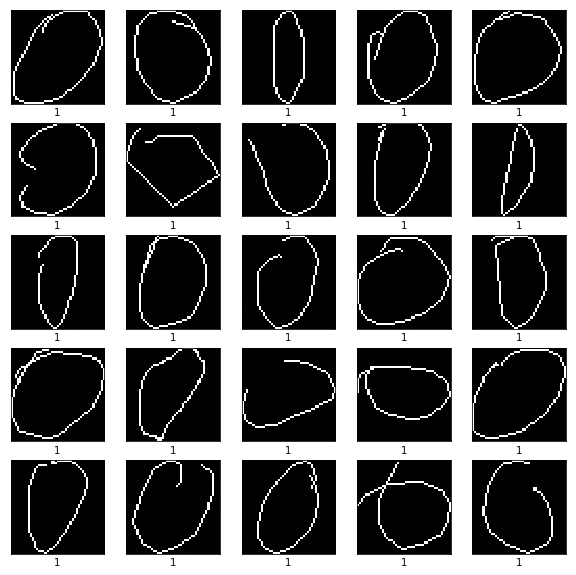

In [182]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [183]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(45, 45)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [184]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [185]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
3699/3699 [==============================] - 2s 407us/step - loss: 2.0417 - acc: 0.2376
Epoch 2/50
3699/3699 [==============================] - 1s 243us/step - loss: 1.5856 - acc: 0.4931
Epoch 3/50
3699/3699 [==============================] - 1s 252us/step - loss: 1.2764 - acc: 0.6080
Epoch 4/50
3699/3699 [==============================] - 1s 185us/step - loss: 1.0756 - acc: 0.6629
Epoch 5/50
3699/3699 [==============================] - 1s 173us/step - loss: 0.9260 - acc: 0.7205
Epoch 6/50
3699/3699 [==============================] - 1s 282us/step - loss: 0.8411 - acc: 0.7418
Epoch 7/50
3699/3699 [==============================] - 1s 263us/step - loss: 0.7390 - acc: 0.7740
Epoch 8/50
3699/3699 [==============================] - 1s 233us/step - loss: 0.6712 - acc: 0.8072
Epoch 9/50
3699/3699 [==============================] - 1s 217us/step - loss: 0.6414 - acc: 0.8135
Epoch 10/50
3699/3699 [==============================] - 1s 275us/step - loss: 0.5661 - acc: 0.8443
Epoch 11/

In [186]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

symbols[-1] = "/"

3500/3500 [==============================] - 1s 168us/step
Test accuracy: 0.9548571428571428


In [187]:
def solution(gradient, parts_x, parts_y):
    cells = []
    splt = [np.array_split(el, parts_x, 1) for el in np.array_split(gradient, parts_y, 0)]
    for line in splt:
        for cell in line:
            cells.append(np.array(Image.fromarray(cell).resize((45, 45))))
    
    
    ans = model.predict(np.array(cells) / 255.0)
    lines = parts_x
    for i in range(len(cells)):
        if i % lines == 0:
            print()
        if np.argmax(ans[i]) == 0:
            print(" ", end="")
        else:
                print(symbols[np.argmax(ans[i]) - 1], end="")

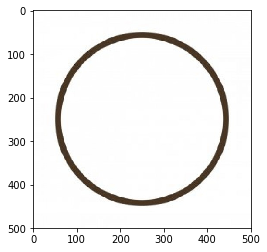


                                                                                                    
                                                                                                    
                                                                                                    
                                                                                                    
                                                                                                    
                                       |=/++++++++++++++++/=|=                                      
                                 ==+++=  ++++!!!!!!!!!!++++== +++||                                 
                             ==++  ++!!!!                  !!!!++  ++|=                             
                          ==+- ++!!                              !!!+ !+==                          
                        =+0 +!!                                      !!+00+|              

In [188]:
from PIL import Image

img = imread("circle.jpg")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img = imread("circle.jpg")
img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 \
                + img[:, :, 2] * 0.114
solution(img, 100, 50)

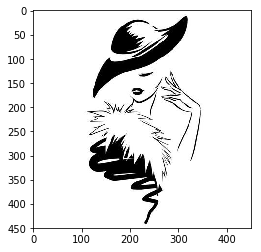


                                                                                                    
                                                                 =+                                 
                                       ==+++++=/              =++/0                                 
                                    =++!=      ! |         =++=++=+                                 
                                   ++++!          ====++++=+0+++0+0                                 
                                  ++++++=+            =+++++++++!!                                  
                                 +++++++++= ++=     ==+=++++++++!                                   
                                -++++++++++=+0 =-=++==+++++++++=                                    
                                +++++++++++-==! +=-+/0++++++!0                                      
                                0+++++|==++=|+!=+-++++++++!                               

In [189]:
img = imread("lady.jpg")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img = imread("lady.jpg")
solution(img, 100, 50)

In [190]:
print(symbols)

['0', '+', '|', '-', '!', '=', '/']


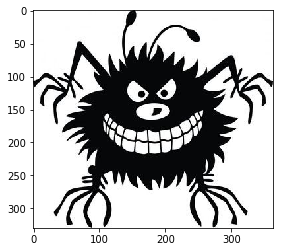


                                    /++                                                             
                                   -==0                                                             
                                   +++0                                                             
                                   +0=            ==+++++|                                          
                                  +0            =+!      0+++|                                      
                                  +            +!         0+!-=                                     
                 |               -+           +=           0!++-                                    
                -=+|             -+       +  +=|                                                    
                +=00==            +  +0  +- +0 +=                                                   
               -0!0+-+|      0    + ++= += -+ ++0=  =+                        ||          

In [191]:
img = imread("monster.jpg")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img = imread("monster.jpg")
img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 \
                + img[:, :, 2] * 0.114
solution(img, 100, 50)

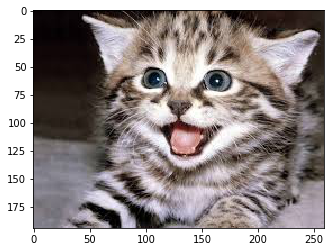

In [199]:
kitten = imread("kitten.jpeg")
plt.imshow(kitten, cmap='gray', vmin=0, vmax=255)
plt.show()

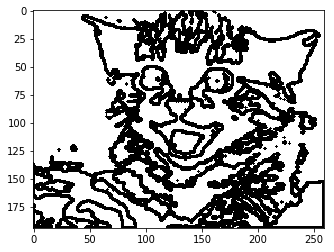

In [200]:
im = cv2.imread('kitten.jpeg')
dimensions = im.shape
tmp = Image.open('whiteboard.jpg')
tmp = tmp.resize((dimensions[1], dimensions[0]), Image.ANTIALIAS)
tmp.save('whiteboard.jpg') 
tmp = cv2.imread('whiteboard.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(tmp, contours, -1, (0,0,0), 2)
plt.imshow(tmp)
plt.show()

In [201]:
tmp = tmp[:, :, 0] * 0.299 + tmp[:, :, 1] * 0.587 \
                + tmp[:, :, 2] * 0.114
solution(tmp, 100, 50)


                                      =+|  0+|++++=| +==                                            
              ++++== +0       =      |+++=++!+00!++|  -|0+                                          
              0===0==|| -+0  !+==+||++++|++ +0=+ | +   +0=+                                         
                !!++!!+====|||0+|++++-+=++= +0==0+ +=+ +0+|=  =+|=||                                
                 0++0   !0!!!!0=+++=+ + |+++|=+ ++=++0++0++! +++++++=|                  |==+++++=|  
                  +=           ++++0++==++=+++++ |=++=!+=++|=++++!!!!+=|            ==+++!!!!|+++++ 
                  +=           ++0++|=0+0+++-++!+0++ |=++ +++++++=|  !!++++++++++++++!!   ++++!=+|  
                  =+0         ++0+++!|+0  ++++= |+0!=+++0+0+++++++=        !!!!           ++=++++!  
                   +=         +!  =++++=  ++++++=+  +++-+00++++++++                        !!=++!   
                   -+         +0||0+!++!  !0++!+!= =| + +0  !!+|!!                        

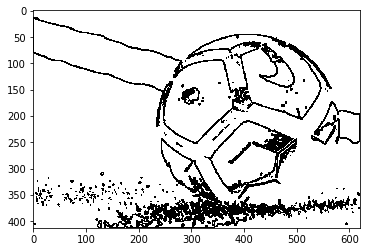

In [202]:
im = cv2.imread('ball.jpg')
dimensions = im.shape
tmp = Image.open('whiteboard.jpg')
tmp = tmp.resize((dimensions[1], dimensions[0]), Image.ANTIALIAS)
tmp.save('whiteboard.jpg') 
tmp = cv2.imread('whiteboard.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(tmp, contours, -1, (0,0,0), 2)
plt.imshow(tmp)
plt.show()

In [203]:
tmp = tmp[:, :, 0] * 0.299 + tmp[:, :, 1] * 0.587 \
                + tmp[:, :, 2] * 0.114
solution(tmp, 100, 50)


                                                                                                    
=|                                                                                                  
 !!+==                                                                                              
     !!+++|                                                                                         
          0!+===                                                                                    
               !!!+00                                   ==++=+!!!!!!+++=||                          
                    !++=|                           =++!0      ===/=|   !+++=                       
                        !++=||                   =+!0      |=+!+!=++++=0  !++++=                    
=                          !!!!++++=0          =+==+++=!!!!0    =++! ++++0   !0++=                  
!+==                               !!++=|    0++!!=-      |++=+!0     !=++|0   !!++|      

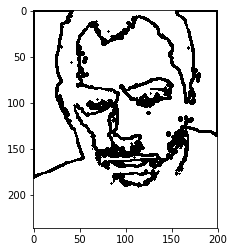

In [212]:
im = cv2.imread('law.jpg')
dimensions = im.shape
tmp = Image.open('whiteboard.jpg')
tmp = tmp.resize((dimensions[1], dimensions[0]), Image.ANTIALIAS)
tmp.save('whiteboard.jpg') 
tmp = cv2.imread('whiteboard.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(tmp, contours, -1, (0,0,0), 2)
plt.imshow(tmp)
plt.show()

In [213]:
tmp = tmp[:, :, 0] * 0.299 + tmp[:, :, 1] * 0.587 \
                + tmp[:, :, 2] * 0.114
solution(tmp, 100, 50)


+!!!!!!!!!!!!!!!!!!=+!                                                      +++!!!!!!!!!!!!!!!!!!!!+
+                 +++!                               -++++++||/              !!++|/                +
+              ==+++!         ==+++               =+|=+!   !!!+++=/             !!+=               +
+             -+|=          -++++++=              |-+++         !+++              !+/              +
+             -+          -++!   !++|   +=     =++++!!=           !+|             !!+=             +
+             +0        -++!      !++=/  =+++++++!!=               !+++||           +=             +
+            -+=        +0          0+++=+++++!!!                    !!!!+=         ++/            +
+            /+|       ++|/          +++!=                               0++        /+-            +
+            +|!       !++!/                                              /+       !!-+=           +
+           /+=        +++++                                             ++!         !+|  

341.78915


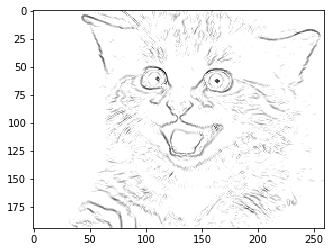

In [219]:
gradient = find_gradient(kitten)[0]
m = -1
for el in gradient:
    m_el = max(el)
    if m_el > m:
        m = m_el
print(m)
gradient_new = (300 - gradient)
plt.imshow(gradient_new, cmap='gray', vmin=0, vmax=255)
plt.show()

In [220]:
solution(gradient_new, 100, 50)


               =  ===     !+ +     +   ++=+| +  |0     ! =                                          
              +0+== !!+-= 0 0  =+=   !!!0 +!      +! +0+ 0   =                                      
              0+==!!+==  !0+=0==0           +!   + + 0 + !+ -  = =                                  
                !!+= !!+= = |0 =  0 +    +  !  =     + +  0    +=  /   = =                          
                 +        !!!0 00=  0+  +0++ = =!=  +     =  =    0     =           +++  ===++++|=  
                 00             + !     ! 0=! |  =0++=!!                =      =   ===++!!    -= != 
                  +   =+         0   = !  |+ !! + !+ 0+              !!!!+++++++++!!!=    ++= =  =  
                   +        +!   ! +       !    +   !!                  =     -              ==     
                   !              =+ - +! 0  + +    + =  +!                 ==   --        -   0!   
                   ==              + =!=  ! =  !    ! = 0  =            -             =   

312.96255


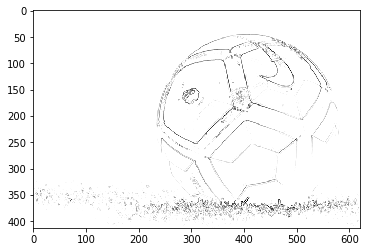

In [221]:
ball = imread("ball.jpg")
gradient = find_gradient(ball)[0]
m = -1
for el in gradient:
    m_el = max(el)
    if m_el > m:
        m = m_el
print(m)
gradient_new = (300 - gradient)
plt.imshow(gradient_new, cmap='gray', vmin=0, vmax=255)
plt.show()

In [222]:
solution(gradient_new, 100, 50)


                                                                                                    
                                                                                                    
                                                                                                    
                                                                                                    
                                                                                                    
                                                        ==++====!!!==+-==                           
                                                    =++!        =+= =    0+=0                       
                                                  +=        =-=  =!= +- --+!====                    
                                               =+==+++====+0    =++0 +!!=      ===                  
                                              /-= -       =++=+!      00-+=    !!=+=      

354.61133


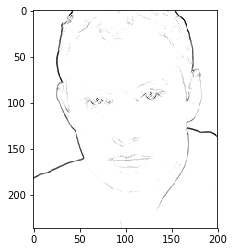

In [223]:
law = imread("law.jpg")
gradient = find_gradient(law)[0]
m = -1
for el in gradient:
    m_el = max(el)
    if m_el > m:
        m = m_el
print(m)
gradient_new = (300 - gradient)
plt.imshow(gradient_new, cmap='gray', vmin=0, vmax=255)
plt.show()

In [224]:
solution(gradient_new, 100, 50)


                    =!             =         -        - =      == = = ====  !+|                     
                   !!=          ===                = -== ! -==         !     -!+==                  
                ==-=+=      = =+     =              ==-         =                !/                 
               !==         + +=     ==              = =               =     + -  =!=                
               + =       =+!!      -/-- -                            =        =  = =|               
               !      -  -            = =   - ===                     - =      =     /              
              +       -              =!= --  ==                                   - !=              
              /=  -                    =                                   ==      =  /             
             -====                                                                 -  =             
             +    =                                                       =           =   